In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data=pd.read_csv('hmelq.csv')
df = data.copy()
df = df.dropna()
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [3]:
dms=pd.get_dummies(df[["job","reason"]])
dms.head()

,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self,reason_DebtCon,reason_HomeImp
153,1,0,0,0,0,0,1,0
154,1,0,0,0,0,0,1,0
155,1,0,0,0,0,0,1,0
156,1,0,0,0,0,0,0,1
157,1,0,0,0,0,0,1,0


In [4]:
y=df["bad"]
X_=df.drop(["job","reason","bad"],axis=1)
X=pd.concat([X_,dms[["job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","reason_DebtCon"]]],axis=1)
X.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,reason_DebtCon
153,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,0,0,0,1
154,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,0,0,0,1
155,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,0,0,0,1
156,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,1,0,0,0,0,0
157,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,0,0,0,0,1


In [5]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [6]:
# statsmodel ile lojistik regresyon
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()
# P>|z| buraya bakarak anlamasız olan değişkenleri görmüş oldun zaten bu olay katsayılara da yansımış durumda
# r^2 değerini burda karşılaştıramazsın

Optimization terminated successfully.
         Current function value: 0.238483
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2002
Method:                           MLE   Df Model:                           15
Date:                Thu, 06 Aug 2020   Pseudo R-squ.:                  0.2007
Time:                        12:48:33   Log-Likelihood:                -481.26
converged:                       True   LL-Null:                       -602.11
Covariance Type:            nonrobust   LLR p-value:                 6.349e-43
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan           -2.625e-05   1.07e-05     -2.453      0.014   -4.72e-05   -5.27e-06
mortdue        -4.837e-06   4.98e-06     -0.972      0.331   -1.46e-05    4.91e-06
value           1.216e-07   4.35e-06      0.028      0.978   -8.41e-06    8.66e-06
yoj               -0.0145      0.013     -1.114      0.265      -0.040       0.011
derog              0.5742      0.131      4.388      0.000       0.318       0.831
delinq             0.7806      0.091      8.595      0.000       0.603       0.959
clage             -0.0066      0.001     -4.898      0.000      -0.009      -0.004
ninq               0.0919      0.048      1.916      0.055      -0.002       0.186
clno              -0.0369      0.011     -3.488      0.000      -0.058      -0.016
debtinc            0.0704      0.010      6.833      0.000       0.050       0.091
job_Mgr           -2.4682      0.364     -6.774      0.000      -3.182      -1.754
job_Office        -3.0527      0.381     -8.013      0.000      -3.799      -2.306
job_Other         -2.6848      0.317     -8.457      0.000      -3.307      -2.063
job_ProfEx        -2.5181      0.336     -7.494      0.000      -3.177      -1.860
job_Sales         -1.3558      0.620     -2.187      0.029      -2.571      -0.141
reason_DebtCon    -0.0854      0.193     -0.443      0.658      -0.463       0.292
==================================================================================
"""

In [7]:
X=X.drop(["mortdue","reason_DebtCon","yoj","value","ninq"],axis=1)

In [8]:
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.240438
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2007
Method:                           MLE   Df Model:                           10
Date:                Thu, 06 Aug 2020   Pseudo R-squ.:                  0.1942
Time:                        12:48:36   Log-Likelihood:                -485.20
converged:                       True   LL-Null:                       -602.11
Covariance Type:            nonrobust   LLR p-value:                 1.369e-44
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -3.055e-05    9.4e-06     -3.249      0.001    -4.9e-05   -1.21e-05
derog          0.6197      0.129      4.805      0.000       0.367       0.873
delinq         0.7805      0.089      8.788      0.000       0.606       0.955
clage         -0.0075      0.001     -5.801      0.000      -0.010      -0.005
clno          -0.0413      0.010     -4.087      0.000      -0.061      -0.021
debtinc        0.0673      0.010      6.936      0.000       0.048       0.086
job_Mgr       -2.4512      0.346     -7.094      0.000      -3.128      -1.774
job_Office    -3.0267      0.361     -8.378      0.000      -3.735      -2.319
job_Other     -2.6384      0.293     -8.998      0.000      -3.213      -2.064
job_ProfEx    -2.5794      0.321     -8.024      0.000      -3.209      -1.949
job_Sales     -1.3035      0.603     -2.160      0.031      -2.486      -0.121
==============================================================================
"""

In [15]:
#scikit-learn ile Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(C=0.1,solver = "newton-cg") 
loj_model = loj.fit(X_train,y_train)
loj_model
# modeli train setine kurdun fit ettin
# farklı solverlar ile model kurma kolaylığı var

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
y_pred_train = loj_model.predict(X_train)
# train setini verdik Tahmin değerlerini çektik.

In [102]:
accuracy_score(y_train, y_pred_train)

0.9244114002478315

In [103]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1471
           1       0.84      0.18      0.30       143

    accuracy                           0.92      1614
   macro avg       0.88      0.59      0.63      1614
weighted avg       0.92      0.92      0.90      1614



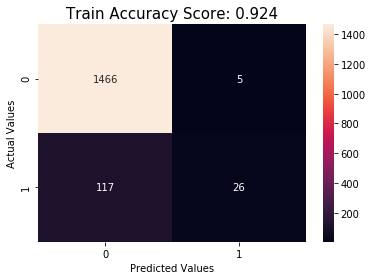

In [104]:
from sklearn.metrics import confusion_matrix as cm
predictions = loj_model.predict(X_train)
score = round(accuracy_score(y_train, predictions), 3)
cm1 = cm(y_train, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Train Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [105]:
loj_model.intercept_
# B0 değerini çektin

array([-3.35188221])

In [106]:
loj_model.coef_
# Katsayıları aldın

array([[-2.01081390e-05, -6.75022444e-07,  2.19855561e-06,
        -1.75695960e-02,  4.00179049e-01,  6.85443755e-01,
        -5.08216267e-03,  9.31312306e-02, -2.49099266e-02,
         7.15079691e-02, -1.26528497e-01, -3.91909352e-01,
        -2.55456988e-01, -2.10592789e-01,  4.44909758e-02,
        -6.18251118e-02]])

## Lojistik Regresyon Tahmin & Model Tuning

In [107]:
loj_model

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
y_pred = loj_model.predict(X_test)
# test setini verdik Tahmin değerlerini çektik.

In [109]:
confusion_matrix(y_test, y_pred)
# gücü düşük hastaları tespitte oran çok düşük 

array([[368,   1],
       [ 30,   5]])

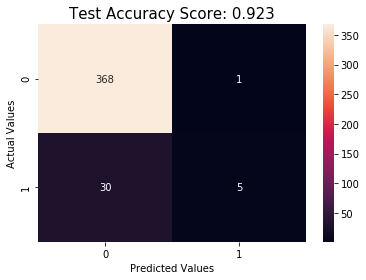

In [110]:
from sklearn.metrics import confusion_matrix as cm
predictions = loj_model.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Test Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [111]:
accuracy_score(y_test, y_pred)
# accuracy oranımız bu şekilde geldi.


0.9232673267326733

In [112]:
print(classification_report(y_test, y_pred))
# sınıflandırma ile ilgili detaylı bilgi almamızı sağlayan output


              precision    recall  f1-score   support

           0       0.92      1.00      0.96       369
           1       0.83      0.14      0.24        35

    accuracy                           0.92       404
   macro avg       0.88      0.57      0.60       404
weighted avg       0.92      0.92      0.90       404



In [113]:
loj_model.predict_proba(X_test)[0:10][:,0:2]
# burda ilk 10 gözlemin 0 ve 1 olma olasılıklarını görmüş olduk

array([[0.9368772 , 0.0631228 ],
       [0.90337934, 0.09662066],
       [0.96846372, 0.03153628],
       [0.97674545, 0.02325455],
       [0.9058224 , 0.0941776 ],
       [0.95139755, 0.04860245],
       [0.89210843, 0.10789157],
       [0.91923899, 0.08076101],
       [0.98292371, 0.01707629],
       [0.96129049, 0.03870951]])

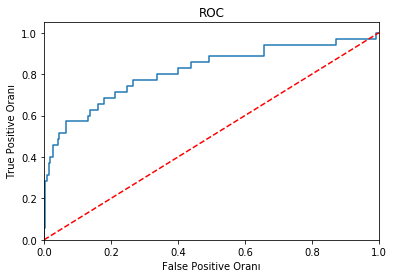

In [114]:
# ROC eğrisi çizdiriyoruz.
logit_roc_auc = roc_auc_score(y_test, loj_model.predict(X_test))# burdaki score öenmli

fpr, tpr, thresholds = roc_curve(y_test, loj_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [115]:
logit_roc_auc = roc_auc_score(y_test, loj_model.predict(X_test))
logit_roc_auc 
# altta kalan alan

0.5700735578784358

In [116]:
cross_val_score(loj_model, X_test, y_test, cv = 10)
# train seti için 10 katlı cross-val yaptık ve ortalamasını aldık

array([0.92682927, 0.95121951, 1.        , 0.90243902, 0.9       ,
       0.925     , 0.95      , 0.95      , 0.925     , 0.9       ])

In [117]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.933048780487805